House Price Index
===========================

Data is downloaded from the [Federal Housing Finance Agency](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

Read the dataset CSV.

In [2]:

df = pd.read_csv('HPI_master.csv',encoding = "ISO-8859-1", parse_dates=[[6,7]], index_col='yr_period')

Filter the dataset to get the data for Ohio and Plot.

<AxesSubplot:xlabel='yr_period'>

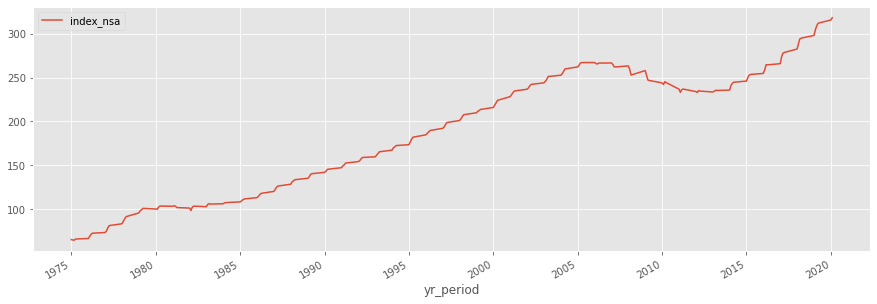

In [3]:
# Make a copy
dfOhio = df.copy()

# Filter
dfOhio = dfOhio[dfOhio.frequency == 'quarterly']
dfOhio = dfOhio[dfOhio.place_name == 'Ohio']
dfOhio = dfOhio[dfOhio.hpi_type == 'traditional']
dfOhio = dfOhio[dfOhio.hpi_flavor == 'all-transactions']

# Plot
dfOhio[['place_name', 'index_nsa']].sort_values(by = ['yr_period']).plot()


Plot every location.

<AxesSubplot:xlabel='yr_period'>

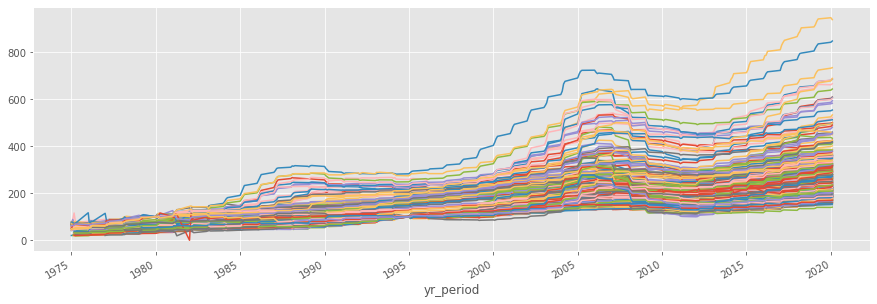

In [4]:
# Make a copy
dfAll = df.copy()

# Filter
dfAll = dfAll[dfAll.frequency == 'quarterly']
dfAll = dfAll[dfAll.hpi_type == 'traditional']
dfAll = dfAll[dfAll.hpi_flavor == 'all-transactions']


dfAll = dfAll[['place_name', 'index_nsa']].sort_values(by = ['yr_period'])

# fig, ax = plt.subplots(figsize=(15,7))
dfAll.groupby(['yr_period','place_name']).sum('index_nsa').unstack().plot(legend=False)

